# Esempio di classificazione con SVM

Import librerie necessarie.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Generiamo il dataset randomicamente.

In [2]:
X, y = make_blobs(n_samples=500, centers=2, random_state=59, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

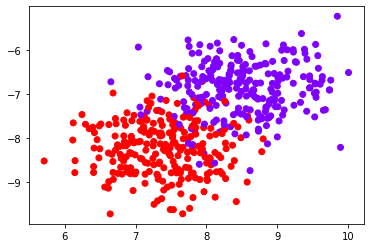

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

Suddividiamo i dati in in due porzioni: una per addestrare il modello, una per testare le sue performance.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Addestriamo il modello SVM utilizzando i dati selezionati per il train.

In [5]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)

LinearSVC(max_iter=10000)

Rappresentiamo l'iperpiano e i relativi vettori di supporto individuiati.

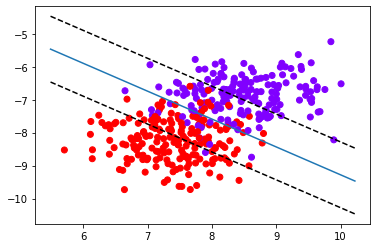

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

Proviamo ad assegnare dei nuovi punti e verificare le come il modello li classifica

In [7]:
svc.predict(np.array([[6,-10],[9,-5]]))

array([ 1., -1.])

Calcoliamo la matrice di confusione per verificare le performance calcolando la prediction di tutto il test set

In [8]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[66,  5],
       [ 3, 51]], dtype=int64)

da cui segue il calcolo dell'accuratezza:

In [9]:
accuracy_score(y_test, y_pred)

0.936